<a href="https://colab.research.google.com/github/noran97/NTI-AI-projects/blob/main/simpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(1395,)

In [ ]:
X_train

array([list([1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]),
       list([1, 486, 341, 785, 26, 14, 482, 26, 255, 606, 252, 83, 146, 91, 102, 17, 12]),
       list([1, 245, 273, 397, 124, 53, 191, 26, 14, 83, 26, 39, 32, 32, 11, 14, 19, 12, 11, 88, 279, 59, 11, 14, 472, 59, 11, 17, 12]),
       ...,
       list([1, 53, 102, 26, 14, 158, 26, 39, 4630, 6694, 14, 3832, 4032, 88, 32, 8204, 5623, 14, 32, 4881, 5006, 29, 53, 841, 26, 14, 425, 26, 39, 5578, 4744, 14, 4693, 2442, 88, 83, 72, 11, 14, 72, 7473, 6173, 17, 12]),
       list([1, 53, 46, 160, 26, 46, 5352, 2637, 86, 160, 5191, 3302, 123, 943, 396, 4500, 207, 48, 17, 12]),
       list([1, 3840, 341, 353, 26, 14, 61, 19, 26, 255, 219, 93, 124, 146, 93, 102, 123, 4433, 274, 1146, 131, 664, 338, 721, 17, 12])],
      dtype=object)

In [ ]:
y_train.shape

(1395,)

In [ ]:
y_train

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:

#pad the sequences with zeros
# padding parameter is set to 'post' => 0's are appended to end of sequences

X_train =tf.keras.utils.pad_sequences(X_train, padding = 'post')

X_test = tf.keras.utils.pad_sequences(X_test, padding = 'post')


In [ ]:
X_train

array([[   1,  245,  273, ...,    0,    0,    0],
       [   1,  486,  341, ...,    0,    0,    0],
       [   1,  245,  273, ...,    0,    0,    0],
       ...,
       [   1,   53,  102, ...,    0,    0,    0],
       [   1,   53,   46, ...,    0,    0,    0],
       [   1, 3840,  341, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train.shape

(1395, 49)

In [ ]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train

array([[[   1],
        [ 245],
        [ 273],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [ 486],
        [ 341],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [ 245],
        [ 273],
        ...,
        [   0],
        [   0],
        [   0]],

       ...,

       [[   1],
        [  53],
        [ 102],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [  53],
        [  46],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [3840],
        [ 341],
        ...,
        [   0],
        [   0],
        [   0]]], dtype=int32)

In [ ]:
X_train.shape

(1395, 49, 1)

In [ ]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
y_train = y_data[:1395]
y_test = y_data[1395:]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape

(1395, 46)

In [ ]:
from keras.layers import Dense, Embedding
model = Sequential([
    Embedding(num_words, 128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(np.max(y_train) + 1, activation='softmax')
])

In [ ]:

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print model summary
model.summary()
# Train the model
history = model.fit(X_train, y_train, batch_size=32,epochs=20, validation_split=0.1, verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.6201 - loss: 2.9183 - val_accuracy: 0.7000 - val_loss: 1.1494
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.7090 - loss: 1.2283 - val_accuracy: 0.7000 - val_loss: 1.0222
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.7541 - loss: 0.9710 - val_accuracy: 0.8857 - val_loss: 0.7048
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8110 - loss: 0.8325 - val_accuracy: 0.8857 - val_loss: 0.6648
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8333 - loss: 0.7137 - val_accuracy: 0.8857 - val_loss: 0.6575
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8494 - loss: 0.6351 - val_accuracy: 0.8857 - val_loss: 0.6214
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.8619 - loss: 0.5857 - val_accuracy: 0.8857 - val_loss: 0.6131
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.8698 - loss: 0.4996 - val_accuracy: 0.8929 - 

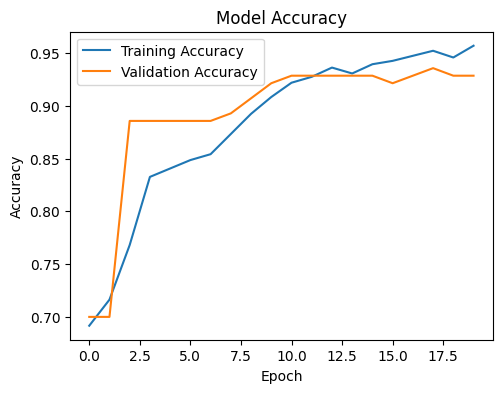

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()